In [173]:
#Import libraries
# 
import yfinance as yf
import numpy as np
import pandas as pd
import hvplot.pandas
from pathlib import Path
from yahoofinancials import YahooFinancials
import matplotlib.pyplot as plt

master_data = pd.read_csv(Path('./Resources/master.csv'),)
risk_free_rate = pd.read_csv(Path('./risk_free_rate.csv'), index_col='Date', parse_dates=True, infer_datetime_format=True)

In [174]:
#Display Master Data
master_data.head()

,Rank,Column1,Code,Company,Price,1 Day,1 Week,1 Month,1 Year,Sector,Mkt Cap
0,1.0,NaN,BHP,BHP Group Ltd,$42.98,4.32%,6.76%,-1.58%,-0.27%,Materials,$217.58 B
1,2.0,NaN,CBA,Commonwealth Bank of Australia,$93.54,-0.21%,6.84%,-12.28%,-6.34%,Financials,$159.62 B
2,3.0,NaN,CSL,CSL Ltd,$274.03,0.38%,4.18%,1.86%,-4.99%,Health Care,$132 B
3,4.0,NaN,NAB,National Australia Bank Ltd,$27.79,-0.50%,6.64%,-12.28%,6.39%,Financials,$88.72 B
4,5.0,NaN,WBC,Westpac Banking Corporation,$19.75,-0.85%,2.92%,-18.02%,-23.51%,Financials,$69.15 B


In [175]:
# Cleanup data to get sectors
sectors_data = master_data.groupby('Sector').sum()



#only_sectors_data = sectors_data.drop[('Colums' = 'Rank'),( Axis =1) ]

In [176]:
# Display cleaned data
sectors_data

,Rank
Sector,
-,315814.0
Basic Materials,1890.0
Communication Services,73792.0
Consumer Discretionary,131135.0
Consumer Staples,99253.0
Energy,184411.0
Financials,222014.0
Health Care,230356.0
Industrials,201717.0


In [177]:
clean = sectors_data.drop(columns='Rank')
clean

# Check for nulls
# clean.isnull().mean() * 100

# # Drop nulls
# clean = clean.dropna().copy()

# clean

#DataFrame.drop(labels=None, axis=0, index=None, columns=None, level=None, inplace=False, errors='raise')[source]

""
Sector
-
Basic Materials
Communication Services
Consumer Discretionary
Consumer Staples
Energy
Financials
Health Care
Industrials


In [178]:
# Export csv data

clean.to_csv('./clean.csv')

In [179]:
user_portfolio = []

In [180]:
# #Import user input data
portfoliio_data = yf.download('a2m.ax ad8.ax kmd.ax asb.ax csl.ax whc.ax mqg.ax', start="2010-01-01", end="2022-04-30")


[*********************100%***********************]  7 of 7 completed


In [181]:
#Display Portfolio Data 
portfoliio_data.head()

Adj Close                                                   \
              A2M.AX AD8.AX    ASB.AX     CSL.AX    KMD.AX     MQG.AX   
Date                                                                    
2010-01-04       NaN    NaN  1.778816  26.487282  1.014370  26.140869   
2010-01-05       NaN    NaN  1.755614  26.177584  0.995291  26.647341   
2010-01-06       NaN    NaN  1.724679  25.916788  0.979391  26.799833   
2010-01-07       NaN    NaN  1.747880  26.120531  1.004831  26.407719   
2010-01-08       NaN    NaN  1.771082  26.169434  1.017550  26.631012   

                      Close                ...      Open                    \
              WHC.AX A2M.AX AD8.AX ASB.AX  ...    KMD.AX     MQG.AX WHC.AX   
Date                                       ...                               
2010-01-04  3.920300    NaN    NaN   2.30  ...  1.582235  47.352112   5.30   
2010-01-05  3.988152    NaN    NaN   2.27  ...  1.553114  47.696312   5.25   
2010-01-06  4.101237    NaN    NaN   2.23  ...  1.514286  48.345375   5.34   
2010-01-07  4.025847    NaN    NaN   2.26  ...  1.494872  48.630569   5.45   
2010-01-08  4.048464    NaN    NaN   2.29  ...  1.553114  48.040512   5.36   

           Volume                                                       
           A2M.AX AD8.AX    ASB.AX   CSL.AX   KMD.AX   MQG.AX   WHC.AX  
Date                                                                    
2010-01-04    NaN    NaN   79023.0   505737   568289   689670  1835131  
2010-01-05    NaN    NaN   86459.0  1349052  2946995  2344178   750782  
2010-01-06    NaN    NaN  109579.0  1362666  1702752  2496391  1185354  
2010-01-07    NaN    NaN  186450.0  1296318  2095666  2070003  1449834  
2010-01-08    NaN    NaN  129079.0  1141443  3008746  1486022  1345638  

[5 rows x 42 columns]

In [182]:
# Clean Portfolio Data to get close values for selected portfolio

clean_portfolio_data = portfoliio_data.Close

# Display Clean Portfolio Data
 
clean_portfolio_data.head()


,A2M.AX,AD8.AX,ASB.AX,CSL.AX,KMD.AX,MQG.AX,WHC.AX
Date,,,,,,,
2010-01-04,NaN,NaN,2.30,32.500000,1.548261,47.204597,5.20
2010-01-05,NaN,NaN,2.27,32.119999,1.519140,48.119186,5.29
2010-01-06,NaN,NaN,2.23,31.799999,1.494872,48.394547,5.44
2010-01-07,NaN,NaN,2.26,32.049999,1.533700,47.686478,5.34
2010-01-08,NaN,NaN,2.29,32.110001,1.553114,48.089684,5.37


In [183]:
# Plot Data
clean_portfolio_data.hvplot.line(
    xlabel= 'Date',
    ylabel = 'AUD',
)
    

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

## Calculate Annualised Std Dev


In [184]:
#Calculate Daily returns

portfolio_returns = clean_portfolio_data #.pct_change().dropna().copy()
portfolio_returns.head()

,A2M.AX,AD8.AX,ASB.AX,CSL.AX,KMD.AX,MQG.AX,WHC.AX
Date,,,,,,,
2010-01-04,NaN,NaN,2.30,32.500000,1.548261,47.204597,5.20
2010-01-05,NaN,NaN,2.27,32.119999,1.519140,48.119186,5.29
2010-01-06,NaN,NaN,2.23,31.799999,1.494872,48.394547,5.44
2010-01-07,NaN,NaN,2.26,32.049999,1.533700,47.686478,5.34
2010-01-08,NaN,NaN,2.29,32.110001,1.553114,48.089684,5.37


In [185]:
# Plot Daily returns Chart

portfolio_returns.hvplot()



:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [186]:
# Show Risk Free rate Graph
# risk_free_rate.hvplot.line()

In [187]:
# Concatenate returns into one DataFrame to include risk free rate

rfr_portfolios_returns = pd.concat([portfolio_returns, risk_free_rate], axis="columns", join="inner")
rfr_portfolios_returns.head()

,A2M.AX,AD8.AX,ASB.AX,CSL.AX,KMD.AX,MQG.AX,WHC.AX,rf_rate
Date,,,,,,,,
2010-01-04,NaN,NaN,2.30,32.500000,1.548261,47.204597,5.20,0.000009
2010-01-05,NaN,NaN,2.27,32.119999,1.519140,48.119186,5.29,0.000008
2010-01-06,NaN,NaN,2.23,31.799999,1.494872,48.394547,5.44,0.000007
2010-01-07,NaN,NaN,2.26,32.049999,1.533700,47.686478,5.34,0.000006
2010-01-08,NaN,NaN,2.29,32.110001,1.553114,48.089684,5.37,0.000006


In [188]:
# Plot Daily Returns 
rfr_portfolios_returns.hvplot()

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [189]:
#Calculate Sharpe Ratio for all stocks

# Calculate Sharpe Ratio
sharpe_ratios = ((rfr_portfolios_returns.mean()-rfr_portfolios_returns['rf_rate'].mean()) * 252) / (rfr_portfolios_returns.std() * np.sqrt(252))
sharpe_ratios

A2M.AX     21.163694
AD8.AX     37.081496
ASB.AX     36.187937
CSL.AX     22.218895
KMD.AX     48.295683
MQG.AX     32.475688
WHC.AX     28.854595
rf_rate     0.000000
dtype: float64

In [190]:
#Plot Sharpe Ratio Bar Chart 
sharpe_ratios.hvplot.bar( title= 'Sharpe Ratio for selectd Portfolio',rot= 90)

:Bars   [index]   (0)

In [201]:
# Calculate Covariance

# Log of percentage change
cov_matrix = clean_portfolio_data.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

,A2M.AX,AD8.AX,ASB.AX,CSL.AX,KMD.AX,MQG.AX,WHC.AX
A2M.AX,0.000918,0.000104,0.000061,0.000088,0.000066,0.000104,0.000066
AD8.AX,0.000104,0.001100,0.000204,0.000111,0.000280,0.000241,0.000164
ASB.AX,0.000061,0.000204,0.000730,0.000059,0.000076,0.000096,0.000093
CSL.AX,0.000088,0.000111,0.000059,0.000212,0.000031,0.000089,0.000065
KMD.AX,0.000066,0.000280,0.000076,0.000031,0.000820,0.000117,0.000092
MQG.AX,0.000104,0.000241,0.000096,0.000089,0.000117,0.000294,0.000150
WHC.AX,0.000066,0.000164,0.000093,0.000065,0.000092,0.000150,0.000909


In [202]:
#Calculate Variance
# Randomly weighted portfolio's variance
w = {'asb.ax': 0.1, 'csl.ax': 0.3, 'kmd.ax': 0.1, 'whc': 0.2, 'mqg.ax' : .3 , 'a2m.ax' : .05, 'ad8.ax': .01 }
port_var = cov_matrix.mul(w, axis=0).mul(w, axis=1).sum().sum()
port_var

0.0

In [203]:
# Calculate Correlation Matrix 
corr_matrix = clean_portfolio_data.pct_change().apply(lambda x: np.log(1+x)).corr()
corr_matrix

,A2M.AX,AD8.AX,ASB.AX,CSL.AX,KMD.AX,MQG.AX,WHC.AX
A2M.AX,1.000000,0.111199,0.075063,0.183525,0.073384,0.203323,0.065800
AD8.AX,0.111199,1.000000,0.246971,0.198156,0.266651,0.415976,0.160334
ASB.AX,0.075063,0.246971,1.000000,0.149632,0.098210,0.207184,0.114089
CSL.AX,0.183525,0.198156,0.149632,1.000000,0.073606,0.354565,0.147850
KMD.AX,0.073384,0.266651,0.098210,0.073606,1.000000,0.238035,0.106637
MQG.AX,0.203323,0.415976,0.207184,0.354565,0.238035,1.000000,0.290753
WHC.AX,0.065800,0.160334,0.114089,0.147850,0.106637,0.290753,1.000000


In [204]:
# Yearly returns for individual companies
yearly_return= clean_portfolio_data.resample('Y').last().pct_change().mean()
yearly_return

A2M.AX    0.384223
AD8.AX    0.308563
ASB.AX    0.069391
CSL.AX    0.205957
KMD.AX    0.076128
MQG.AX    0.186742
WHC.AX    0.194952
dtype: float64

In [205]:
#Calculate Standatd Deviation to determine volatility 

annual_sd = clean_portfolio_data.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(252))
annual_sd

A2M.AX    0.481015
AD8.AX    0.526496
ASB.AX    0.428971
CSL.AX    0.231257
KMD.AX    0.454619
MQG.AX    0.272252
WHC.AX    0.478702
dtype: float64

In [206]:
# Create a table for visualising returns and volatility of assets


assets = pd.concat([yearly_return, annual_sd], axis=1) 
assets.columns = ['Returns', 'Volatility']
assets.hvplot.bar( rot=90)

:Bars   [index,Variable]   (value)

In [207]:
#Define Variables required for Portfolio Optimisation
p_ret = []        #For Returns
p_vol = []        #For Volatility
p_weights = []    #For weights

num_assets = len(clean_portfolio_data.columns) 
num_portfolios =10000


In [208]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, yearly_return) # Returns are the product of individual expected returns of asset and its 
                                      # weights 
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    annual_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(annual_sd)
    data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(clean_portfolio_data.columns.to_list()):                                                        #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]
portfolios  = pd.DataFrame(data)
portfolios.head()



,Returns,Volatility,A2M.AX weight,AD8.AX weight,ASB.AX weight,CSL.AX weight,KMD.AX weight,MQG.AX weight,WHC.AX weight
0,0.196225,0.225989,0.194365,0.086166,0.150071,0.115239,0.225495,0.113814,0.114850
1,0.219996,0.228363,0.217938,0.102989,0.144829,0.116229,0.083393,0.132928,0.201694
2,0.205261,0.211528,0.147964,0.028165,0.022833,0.218029,0.155860,0.232430,0.194719
3,0.181939,0.212250,0.033971,0.099753,0.186112,0.344963,0.091430,0.041297,0.202473
4,0.187470,0.231398,0.108302,0.087773,0.130924,0.165063,0.193089,0.047048,0.267801


In [209]:
portfolios.hvplot.scatter(x='Volatility', y= 'Returns', color= 'c' , size= 2, title= 'Efficient Frontieer')


:Scatter   [Volatility]   (Returns)

In [210]:
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.                               
min_vol_port



Returns          0.197246
Volatility       0.191743
A2M.AX weight    0.113000
AD8.AX weight    0.020474
ASB.AX weight    0.070167
CSL.AX weight    0.336367
KMD.AX weight    0.116810
MQG.AX weight    0.296149
WHC.AX weight    0.047032
Name: 5799, dtype: float64

In [211]:
# Finding the optimal portfolio

#Define Risk Factor
rf = 0.01 

optimal_risky_portfolio =[]
optimal_risky_portfolio = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_portfolio


Returns          0.260601
Volatility       0.225973
A2M.AX weight    0.252516
AD8.AX weight    0.163358
ASB.AX weight    0.021819
CSL.AX weight    0.369668
KMD.AX weight    0.007131
MQG.AX weight    0.144377
WHC.AX weight    0.041131
Name: 1242, dtype: float64

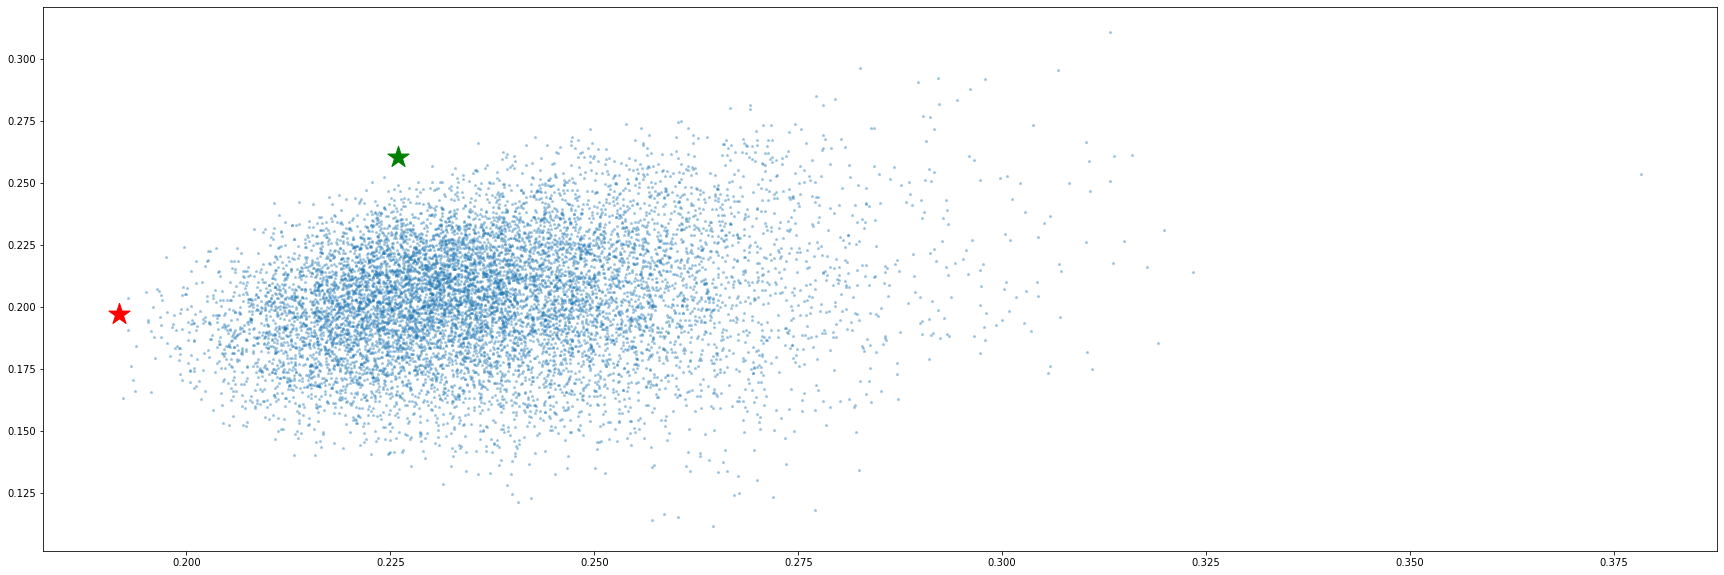

In [217]:
# Plotting optimal portfolio
plt.subplots(figsize=(30, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='*', s=7, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_portfolio[1], optimal_risky_portfolio[0], color='g', marker='*', s=500)

In [213]:
# Define initial Capital

capital = 100000

# Allocate funds



# Get Todays Closing Price for selected stocks




# Returns          0.216191
# Volatility       0.243715
# ASB.AX weight    0.020831
# CSL.AX weight    0.507858
# KMD.AX weight    0.026249
# MQG.AX weight    0.172783
# WHC.AX weight    0.272279
# Name: 5993, dtype: float64